# 🌐 EOmaps
### ... a collection of examples that show how to create beautiful interactive maps
- to run this notebook you'll need to install `ipympl` (e.g. interactive matplotlib backend for jupyter-notebook and jupyter-lab)

In [1]:
import sys
sys.path.append("./../")   # add parent-directory in case maps is not already in the pythonpath

%matplotlib widget

from eomaps import Maps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipympl.backend_nbagg import Canvas

Canvas.header_visible.default_value = False

# 🐣 Quickly visualize your data

3 steps to visualize your data:
- set the data, e.g.: `m.data = <a pandas-DataFrame>`
- set the specifications of the dataset via `m.set_data_specs()`
- call `m.plot_map` to generate the map!


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
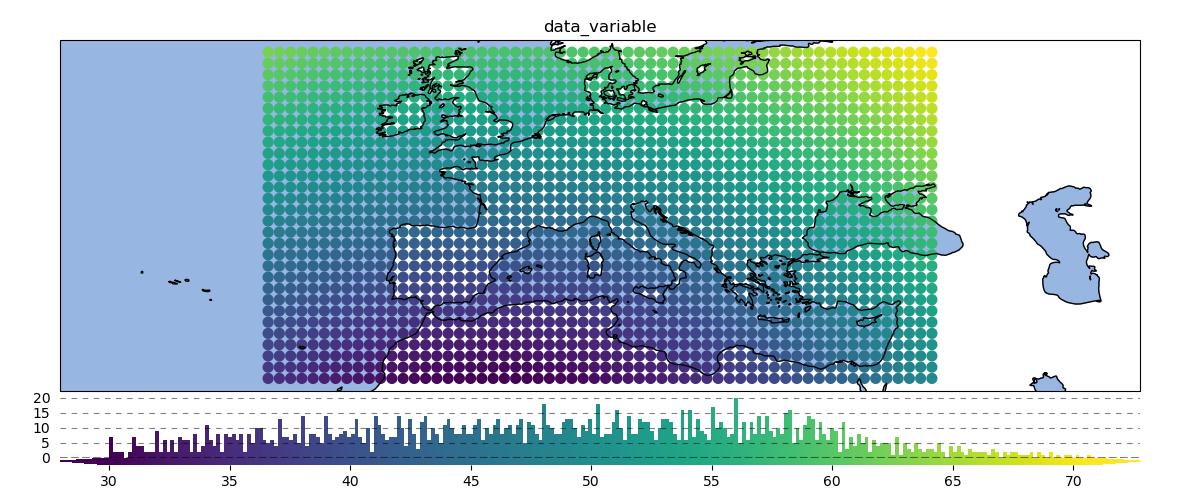

In [2]:
# create some data
lon, lat = np.mgrid[-20:40, 30:60]
data = pd.DataFrame(dict(lon=lon.flat, lat=lat.flat, data_variable=np.sqrt(lon**2 + lat**2).flat))

# --------- initialize a Maps object
m = Maps()
# --------- set the data-specifications
m.set_data(data = data, parameter="data_variable", xcoord="lon", ycoord="lat", in_crs=4326)
# --------- plot the map
m.plot_map()
m.figure.f.set_figheight(5)
# change the height-ratio between the colorbar and the map 
# --------- save the image as png, jpg, pdf etc.
# m.savefig("filepath/file.png", dpi=150)

# 🌍🌎🌏 Classify the data and combine multiple Maps in one figure
- create grids of maps by passing a `GridSpec` specification to `m.plot_map()`
- classify your data via classifiers provided by the `mapclassify` module
- add individual callback functions to each subplot

EOmaps: Parameter was set to: 'data_variable'
EOmaps: classification has been reset to 'Quantiles(k=4)'
EOmaps: classification has been reset to 'StdMean(multiples=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1])'


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
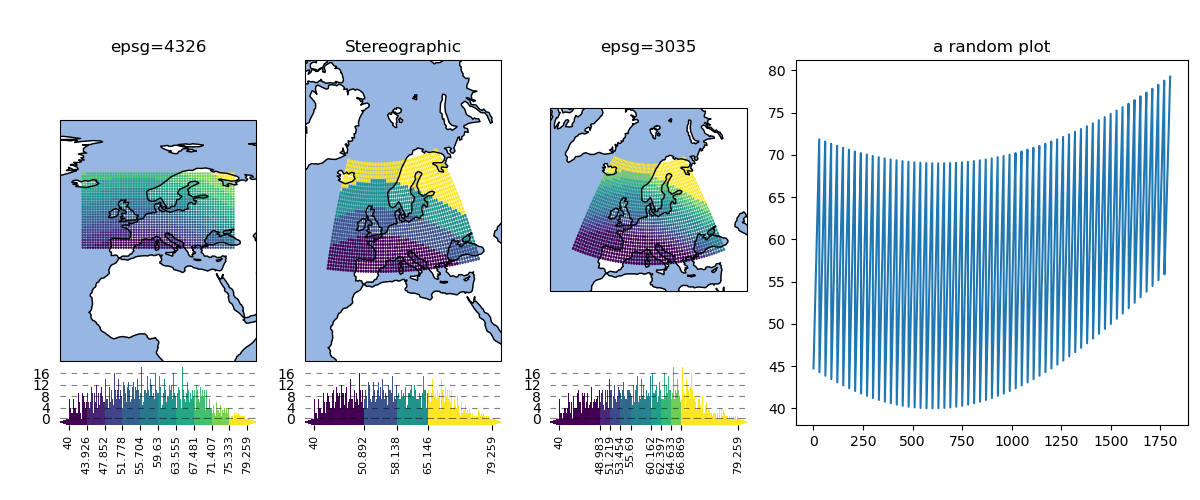

In [3]:
# create some data
lon, lat = np.mgrid[-20:40, 40:70]
data = pd.DataFrame(dict(lon=lon.flat, lat=lat.flat, data_variable=np.sqrt(lon**2 + lat**2).flat))

from matplotlib.gridspec import GridSpec
# --------- initialize a figure and a plot-grid
f = plt.figure(figsize=(14, 5))
f.canvas.show_header=False
gs = GridSpec(1, 4, width_ratios=[1, 1, 1, 2])

# --------- create some random plot on the right axis
ax = f.add_subplot(gs[-1])
ax.set_title("a random plot")
ax.plot(data.data_variable)


m = Maps()
# set the data-specifications (same as the default)
m.set_data_specs(data=data, xcoord="lon", ycoord="lat", in_crs=4326)
# --------- plot a map on the first axes
m.set_plot_specs(crs=4326, add_colorbar=True, title="epsg=4326")
m.set_classify_specs(scheme="EqualInterval", k=10)
m.plot_map(f, gs[0])
m.figure.ax_cb.tick_params(rotation=90, labelsize=8)
m.cb.attach.mark(fc="r", buffer=5)

# --------- plot a map on the second axes
m2 = m.copy(connect_to_parent=True, copy_data="share")
m2.set_plot_specs(crs=m.crs_list.Stereographic(), add_colorbar=True, title="Stereographic")
m2.set_classify_specs(scheme="Quantiles", k=4)
m2.plot_map(gs_ax=gs[1])
m2.figure.ax_cb.tick_params(rotation=90, labelsize=8)
m2.cb.attach.mark(fc="g", buffer=5)

# --------- plot a map on the third axes
m3 = m.copy(connect_to_parent=True, copy_data="share")
m3.set_plot_specs(crs=3035, add_colorbar=True, title="epsg=3035")
m3.set_classify_specs(scheme="StdMean", multiples=[-1, -.75, -.5, -.25, .25, .5, .75, 1])
m3.plot_map(gs_ax=gs[2])
m3.figure.ax_cb.tick_params(rotation=90, labelsize=8)
m3.cb.attach.mark(fc="b", buffer=5)
# --------- make some more room at the bottom of the figure
gs.update(bottom=0.15, left=0.05, right=.99)
f.set_figheight(5)

# 🗺 Customize the appearance of the plot

- use `m.set_plot_specs()` to set the general appearance of the plot
- after creating the plot, you can access individual objects via `m.figure.<...>`
  ... most importantly:
    - `coll` : the collection representing the data on the map
    - `f` : the matplotlib figure
    - `ax`, `ax_cb`, `ax_cb_plot` : the axes used for plotting the map, colorbar and histogram
    - `gridspec`, `cb_gridspec` : the matplotlib GridSpec instances used internally

EOmaps: Parameter was set to: 'data'


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
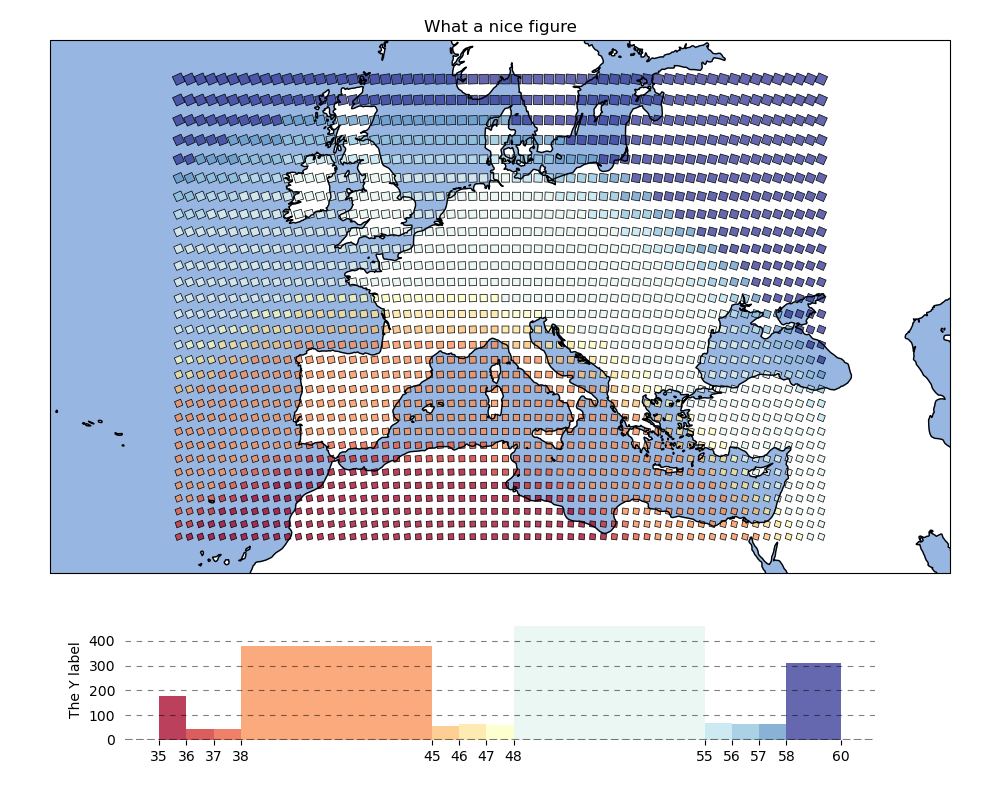

In [4]:
# create some data
lon, lat = np.mgrid[-20:40, 30:60]
data = pd.DataFrame(dict(lon=lon.flat, lat=lat.flat, data=np.sqrt(lon**2 + lat**2).flat))

# ---------initialize a Maps object and set the data
m = Maps()
m.set_data(data=data, xcoord="lon", ycoord="lat", in_crs=4326)

# --------- set the appearance of the plot
m.set_plot_specs(
    label="some parameter",      # set the label of the colorbar
    title="What a nice figure",  # set the title of the figure
    shape="rectangles",          # plot rectangles instead of ellipses 
    cmap="RdYlBu",               # set the colormap
    crs=3857,                    # plot the map in a pseudo-mercator projection
    radius_crs=3035,             # use a crs for europe to define the radius in meters
    radius=25000,                # set the radius to 25km
    histbins="bins",             # use the histogram-bins as set by the classification scheme
    vmin=35,                     # set all values below vmin to vmin
    vmax=60,                     # set all values above vmax to vmax
    cpos="c",                    # the pixel-coordinates represent the "center-position"
    alpha=.75,                   # add some transparency
    add_colorbar=True,           # print the colorbar + histogram
    coastlines=True,             # add coastlines provided by NaturalEarth 
    density=True,                # make the histogram values represent the "probability-density"
)

# --------- set the classification scheme that should be applied to the data
m.set_classify_specs(scheme="UserDefined", bins=[35, 36, 37, 38, 
                                                 45, 46, 47, 48, 
                                                 55, 56, 57, 58])

# plot the map with some additional arguments passed to the polygons
m.plot_map(edgecolor="k", linewidth=0.5)

# ------------------ set the size and position of the figure and its axes
# change width & height
m.figure.f.set_figwidth(10)
m.figure.f.set_figheight(8)
# change the height-ratio between the colorbar and the map 
m.figure.gridspec.set_height_ratios([.5, .25])
# adjust the padding
m.figure.gridspec.update(bottom=0.05, top=.95, left=0.05, right=.95, hspace=-0.2)

# --------- customize the appearance of the colorbar
# change the height-ratio between the colorbar and the histogram
m.figure.cb_gridspec.set_height_ratios([1, .0001])
# manually position the colorbar anywhere on the figure
m.figure.set_colorbar_position([0.125, 0.075 , .75, .15])
# add a y-label to the histogram
_ = m.figure.ax_cb_plot.set_ylabel("The Y label")

# 🛸 Turn your plot into a powerful data-analysis tool
- **callback functions** can easily be attached to the plot to turn it into an interactive plot-widget!
   - there's a nice list of (customizeable) pre-defined callbacks:
     - `annotate` (and `clear_annotations`)
     - `mark` (and `clear_markers`)
     - `plot`, `print_to_console`, `get_values`, `load`
   - ... but you can also define a custom one!

EOmaps: Parameter was set to: 'data'


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
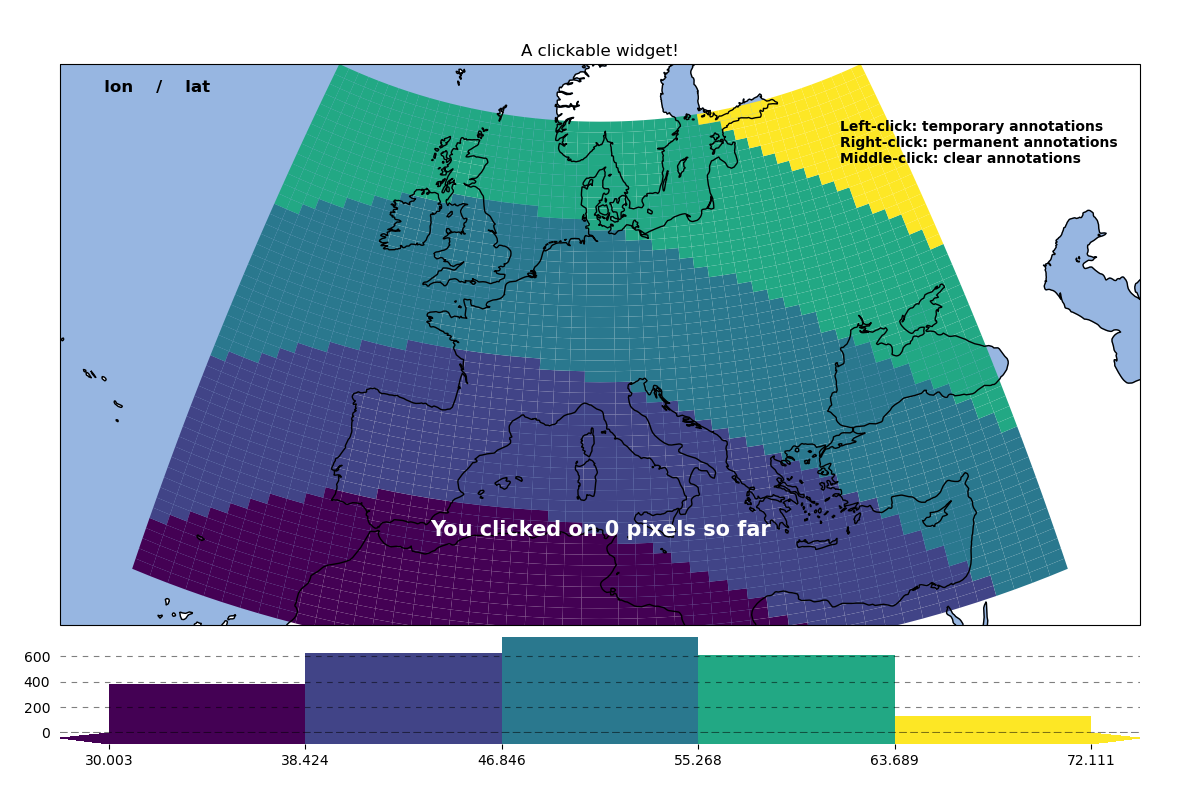

In [5]:
from eomaps import Maps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create some data
#lon, lat = np.mgrid[-20:40, 30:60]
lon, lat = np.meshgrid(np.linspace(-20,40, 50), 
                       np.linspace(30,60, 50))

data = pd.DataFrame(dict(lon=lon.flat, lat=lat.flat, data=np.sqrt(lon**2 + lat**2).flat))

# --------- initialize a Maps object and plot a basic map
m1 = Maps()
m1.set_data(data = data, xcoord="lon", ycoord="lat", in_crs=4326)
m1.set_plot_specs(plot_epsg=3035, 
                 shape="rectangles", 
                 title="A clickable widget!",
                 histbins="bins")
m1.set_classify_specs(scheme="EqualInterval", k=5)
m1.plot_map()
m1.figure.f.set_figheight(8)

# --------- attach pre-defined CALLBACK funcitons ---------

### add a temporary annotation and a marker if you left-click on a pixel
m1.cb.attach.mark(mouse_button=1, permanent=False, fc=[0,0,0,.5], ec="w", ls="--", buffer=2.5, shape="ellipse", layer=1)
m1.cb.attach.annotate(mouse_button=1, permanent=False, bbox=dict(boxstyle="round", fc="w", alpha=0.75), layer=10)
### save all picked values to a dict accessible via m1.cb.get.picked_vals
cid = m1.cb.attach.get_values(mouse_button=1)

### add a permanent marker if you right-click on a pixel
m1.cb.attach.mark(mouse_button=3, permanent=True, facecolor=[1, 0,0,.5], edgecolor="k", buffer=1, shape="rectangle", layer=1)

### add a customized permanent annotation if you right-click on a pixel
def text(m, ID, val, pos, ind):
    return f"ID={ID}"
cid = m1.cb.attach.annotate(mouse_button=3, permanent=True, bbox=dict(boxstyle="round", fc="r"), text=text, xytext=(10, 10),
                            layer=9, # put the permanent annotations on a layer below the temporary annotations
                            )

### remove all permanent markers and annotations if you middle-click anywhere on the map
cid = m1.cb.attach.clear_annotations(mouse_button=2, permanent=True)
cid = m1.cb.attach.clear_markers(mouse_button=2, permanent=True)

# --------- define a custom callback to update some text to the map
txt = m1.figure.f.text(.5, .35, "You clicked on 0 pixels so far",
                      fontsize=15, horizontalalignment="center", 
                      verticalalignment="top",
                      color="w", fontweight="bold", animated=True)
txt2 = m1.figure.f.text(.18, .9, "   lon    /    lat " + "\n",
                      fontsize=12, horizontalalignment="right", 
                      verticalalignment="top",
                      fontweight="bold", animated=True)

# add the custom text objects to the blit-manager (m.BM) to avoid re-drawing the whole
# image if the text changes. (use a high layer number to draw the texts above all other things)
m1.BM.add_artist(txt, layer=20)
m1.BM.add_artist(txt2, layer=20)

def cb1(self, pos, ID, val, **kwargs):
    # update the text that indicates how many pixels we've clicked
    nvals = len(self.cb.get.picked_vals['ID'])
    txt.set_text(f"You clicked on {nvals} pixel" + 
                  ("s" if nvals > 1 else "") + 
                  "!\n... and the " + 
                  ("average" if nvals > 1 else "") + 
                  f"value is {np.mean(self.cb.get.picked_vals['val']):.3f}")
    
    # update the list of lon/lat coordinates on the top left of the figure
    d = self.data.loc[ID]
    lonlat_list = txt2.get_text().splitlines()
    if len(lonlat_list) > 10:
        lonlat_txt = lonlat_list[0] + "\n" + "\n".join(lonlat_list[-10:]) + "\n"
    else:
        lonlat_txt = txt2.get_text()
    txt2.set_text(lonlat_txt + f"{d['lon']:.2f}  /  {d['lat']:.2f}" + "\n")
    
cid = m1.cb.attach(cb1, mouse_button=1)

def cb2(self, pos, ID, val, **kwargs):
    # plot a marker at the pixel-position
    l, = self.figure.ax.plot(*pos, marker="*", animated=True)
    # print the value at the pixel-position
    t = self.figure.ax.text(pos[0], pos[1]-150000, f"{val:.2f}", horizontalalignment="center", verticalalignment="bottom", color=l.get_color(), animated=True)
    # add the artists to the Blit-Manager (m1.BM) to avoid triggering a re-draw of the whole figure each time the callback triggers
    
    # use layer=11 to make sure the marker is drawn ABOVE the temporary annotations (by default drawn on layer 10)
    self.BM.add_artist(l, layer=11)
    # use layer=1 to draw the text BELOW the annotations 
    self.BM.add_artist(t, layer=1)
cid = m1.cb.attach(cb2, mouse_button=3)

# add some static text
_ = m1.figure.f.text(.7, .85, "Left-click: temporary annotations\nRight-click: permanent annotations\nMiddle-click: clear annotations",
                     fontsize=10, horizontalalignment="left", 
                     verticalalignment="top",
                     color="k", fontweight="bold")

# 🌲 🏡🌳 Add overlays and indicators
... an a bit more advanced example
- generation of the plot might take a bit longer since overlays might need to be downloaded first!

EOmaps: Parameter was set to: 'param'


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
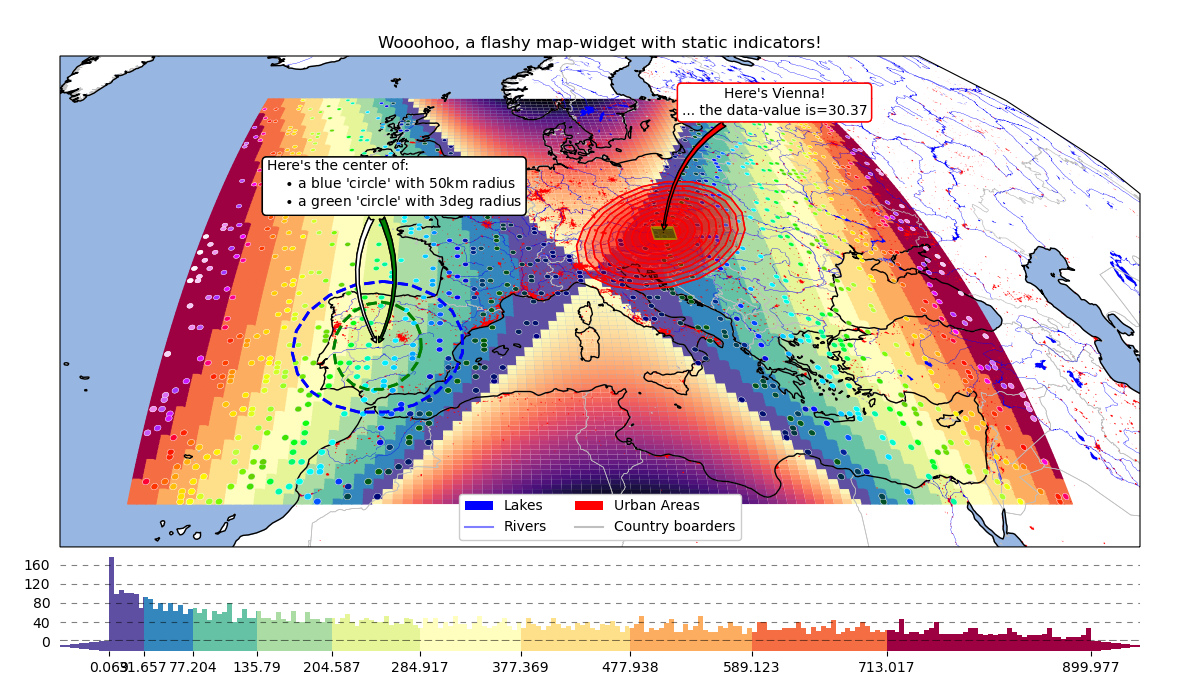

In [6]:
import numpy as np
from eomaps import Maps
import pandas as pd
import matplotlib.pyplot as plt

# create some data
lon, lat = np.meshgrid(np.linspace(-20,40, 100), 
                       np.linspace(30,60, 100))
data = pd.DataFrame(dict(lon=lon.flat, lat=lat.flat, param=(((lon - lon.mean())**2 - (lat - lat.mean())**2)).flat))
data_OK = data[data.param >= 0]
data_OK.var = np.sqrt(data_OK.param)
data_mask = data[data.param < 0]

# --------- initialize a Maps object and plot a basic map
m = Maps()
m.set_data(data = data_OK, xcoord="lon", ycoord="lat", in_crs=4326)
m.set_plot_specs(crs=m.crs_list.Orthographic(),#4326,#3035, 
                 shape="trimesh_rectangles", # use trimesh_rectangles to hide pixel-boarders
                 title="Wooohoo, a flashy map-widget with static indicators!",
                 histbins=200, cmap="Spectral_r")
m.set_classify_specs(scheme="Quantiles", k=10)

m.plot_map()
m.figure.f.set_figheight(7)

# ... add a basic "annotate" callback
cid = m.cb.attach.annotate(bbox=dict(alpha=0.75), color="w")

# --------- add another layer of data to indicate the values in the masked area
maskcoll = m.add_discrete_layer(
    data_mask, 
    **m.data_specs[["xcoord", "ycoord", "parameter", "crs"]],
    shape="rectangles",
    legend_kwargs=False,
    cmap="magma",
)

# --------- add another layer with data provided in a different coordinate system
coll = m.add_discrete_layer(
    data_OK.sample(1000),
    **m.data_specs[["xcoord", "ycoord", "parameter", "crs"]],
    radius=25000,
    radius_crs=3857,
    cmap="gist_ncar",
    norm=plt.Normalize(-1, data_OK.param.max()),
    shape="ellipses",
    legend_kwargs=False,
    dynamic_layer_idx=2   # put this collection on a temporary layer since we want to change it via a callback!
)
# ... change the appearance of the layer
coll.set_edgecolor("w")
coll.set_linewidth(0.25)


# --------- define a callback that will change the position and data-values of the additional layer
def callback(self, **kwargs):
    selection = np.random.randint(0, len(m.data), 1000)
    coll.set_array(data_OK.param.iloc[selection])
    
# attach the callback to the map
m.cb.attach(callback)

# --------- add some basic overlays from NaturalEarth
m.add_overlay(dataspec=dict(resolution='10m', 
                            category='physical', 
                            name='lakes'),
              styledict=dict(ec="none", fc="b"))
m.add_overlay(dataspec=dict(resolution='10m', 
                            category='cultural', 
                            name='admin_0_countries'),
              styledict=dict(ec=".75", fc="none", lw=0.5))
m.add_overlay(dataspec=dict(resolution='10m', 
                            category='cultural', 
                            name='urban_areas'),
              styledict=dict(ec="none", fc="r"))
m.add_overlay(dataspec=dict(resolution='10m', 
                            category='physical', 
                            name='rivers_lake_centerlines'),
              styledict=dict(ec="b", fc="none", lw=0.25))

# --------- add a customized legend for the overlays 
m.add_overlay_legend(ncol=2, loc="lower center", facecolor="w", framealpha=1,
                     update_hl={"admin_0_countries":       [plt.Line2D([], [], c=".75"), "Country boarders"],
                                "rivers_lake_centerlines": [plt.Line2D([], [], c="b", alpha=0.5), "Rivers"],
                                "lakes":                   [None, "Lakes"],
                                "urban_areas":             [None, "Urban Areas"]}, 
                     sort_order=["lakes", "rivers_lake_centerlines", "urban_areas", "admin_0_countries"])

# --------- add some fancy (static) indicators for selected pixels
mark_id = 6060
for buffer in np.linspace(1, 5, 10):
    m.add_marker(ID=mark_id, shape="ellipse", radius="pixel", fc=[1,0,0,.1], ec="r", buffer=buffer*5)
m.add_marker(ID=mark_id, shape="rectangle", radius="pixel", fc="g", ec="y", buffer=3, alpha=0.5)
m.add_marker(ID=mark_id, shape="ellipse", radius="pixel", fc="k", ec="none", buffer=.2)
m.add_annotation(ID=mark_id, text=f"Here's Vienna!\n... the data-value is={m.data.param.loc[mark_id]:.2f}",
                 xytext=(80, 85), textcoords="offset points", bbox=dict(boxstyle="round", fc="w", ec="r"), horizontalalignment="center",
                 arrowprops=dict(arrowstyle="fancy", facecolor="r", connectionstyle="arc3,rad=0.35"))

mark_id = 3324
m.add_marker(ID=mark_id, shape="ellipse", radius=3 ,fc="none", ec="g", ls="--", lw=2)
m.add_annotation(ID=mark_id, text="", xytext=(0, 98), textcoords="offset points",
                 arrowprops=dict(arrowstyle="fancy", facecolor="g", connectionstyle="arc3,rad=-0.25"))

m.add_marker(ID=mark_id, shape="geod_circle", radius=500000, radius_crs=3857, fc="none", ec="b", ls="--", lw=2)
m.add_annotation(ID=mark_id, text="Here's the center of:\n    $\\bullet$ a blue 'circle' with 50km radius\n    $\\bullet$ a green 'circle' with 3deg radius",
                 xytext=(-80, 100), textcoords="offset points", bbox=dict(boxstyle="round", fc="w", ec="k"), horizontalalignment="left",
                 arrowprops=dict(arrowstyle="fancy", facecolor="w", connectionstyle="arc3,rad=0.35"))